In [2]:
# Libraries
library(ggplot2)
library(lattice)
library(Boruta)
library(mlbench)
library(caret)
library(randomForest)
library(data.table)
library(magrittr)
library(dplyr)

In [3]:
# loading csv data
df_value <- fread("/Users/monoaki/Documents/vs_code/R/mdALFF_var.csv")
df_outcome <- fread("/Users/monoaki/Documents/vs_code/R/clinical_data_2.csv")
# print(colnames(df_outcome))
# print(colnames(df_value))

In [4]:
setnames(df_outcome, 'AD8主觀認知障礙[0-1,>=2]', 'AD8')
setnames(df_outcome, 'MOCA客觀認知測驗分數[<=23,>=24]', 'MOCA')
setnames(df_value, 'Subj', 'subj')

In [5]:
# filter outcome csv
df_outcome_AD8 <- df_outcome[, list(subj, AD8)]
df_outcome_MOCA <- df_outcome[, list(subj,MOCA)]
# concat outcome and value
df_outcome_AD8 %<>% df_value[., on='subj']
df_outcome_MOCA %<>% df_value[., on='subj']
# remove subj patient smaple name
df_outcome_AD8 <- df_outcome_AD8[ ,setdiff(colnames(df_outcome_AD8), 'subj'), with=FALSE]
df_outcome_MOCA <- df_outcome_MOCA[ ,setdiff(colnames(df_outcome_MOCA), 'subj'), with=FALSE]
head(df_outcome_AD8,3)
head(df_outcome_MOCA,3)

1_unassigned,10_unassigned,100_DefaultMode,101_DefaultMode,102_DefaultMode,103_DefaultMode,104_DefaultMode,105_DefaultMode,106_DefaultMode,107_DefaultMode,⋯,91_DefaultMode,92_DefaultMode,93_DefaultMode,94_DefaultMode,95_DefaultMode,96_DefaultMode,97_DefaultMode,98_DefaultMode,99_DefaultMode,AD8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.101074696,0.14852861,0.21129578,0.13626199,0.1278285,0.20215517,0.1902377,0.1819101,0.2203637,0.1292864,⋯,0.1446415,0.1905628,0.1441684,0.1056509,0.2566091,0.3291329,0.1165268,0.2794447,0.1577173,0
0.007779604,0.08467234,0.08319998,0.09682172,0.1152275,0.09446929,0.2069102,0.2539292,0.3413064,0.1376202,⋯,0.1195220,0.1375971,0.1343544,0.1049588,0.1256675,0.1682800,0.1163490,0.1490119,0.1471488,1
0.016514320,0.13935576,0.21612960,0.22159655,0.1367812,0.14971316,0.2702085,0.2038244,0.3710622,0.1712115,⋯,0.1499602,0.1222159,0.1197005,0.1508821,0.3305826,0.3419551,0.1552164,0.1999571,0.1010156,3


1_unassigned,10_unassigned,100_DefaultMode,101_DefaultMode,102_DefaultMode,103_DefaultMode,104_DefaultMode,105_DefaultMode,106_DefaultMode,107_DefaultMode,⋯,91_DefaultMode,92_DefaultMode,93_DefaultMode,94_DefaultMode,95_DefaultMode,96_DefaultMode,97_DefaultMode,98_DefaultMode,99_DefaultMode,MOCA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.101074696,0.14852861,0.21129578,0.13626199,0.1278285,0.20215517,0.1902377,0.1819101,0.2203637,0.1292864,⋯,0.1446415,0.1905628,0.1441684,0.1056509,0.2566091,0.3291329,0.1165268,0.2794447,0.1577173,21
0.007779604,0.08467234,0.08319998,0.09682172,0.1152275,0.09446929,0.2069102,0.2539292,0.3413064,0.1376202,⋯,0.1195220,0.1375971,0.1343544,0.1049588,0.1256675,0.1682800,0.1163490,0.1490119,0.1471488,26
0.016514320,0.13935576,0.21612960,0.22159655,0.1367812,0.14971316,0.2702085,0.2038244,0.3710622,0.1712115,⋯,0.1499602,0.1222159,0.1197005,0.1508821,0.3305826,0.3419551,0.1552164,0.1999571,0.1010156,27


In [6]:
# Feature Selection
set.seed(123)
boruta_AD8 <- Boruta(AD8 ~ ., data = df_outcome_AD8, doTrace = 0, maxRuns = 500)
boruta_MOCA <- Boruta(MOCA ~ ., data = df_outcome_MOCA, doTrace = 0, maxRuns = 500)

In [7]:
boruta_AD8

ERROR: Error in is.data.frame(x): argument "x" is missing, with no default


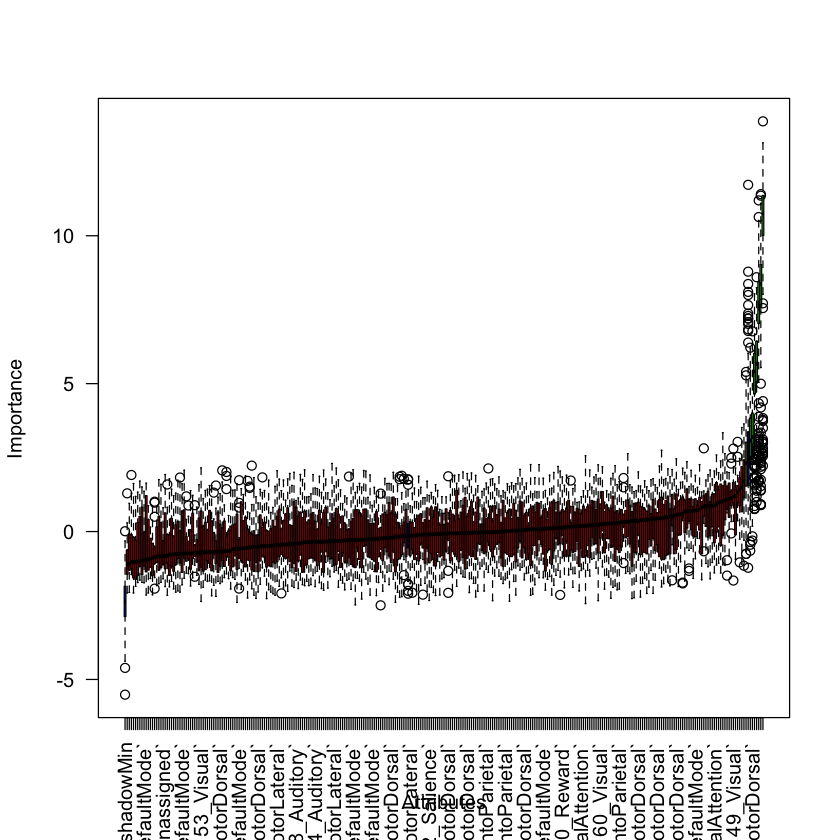

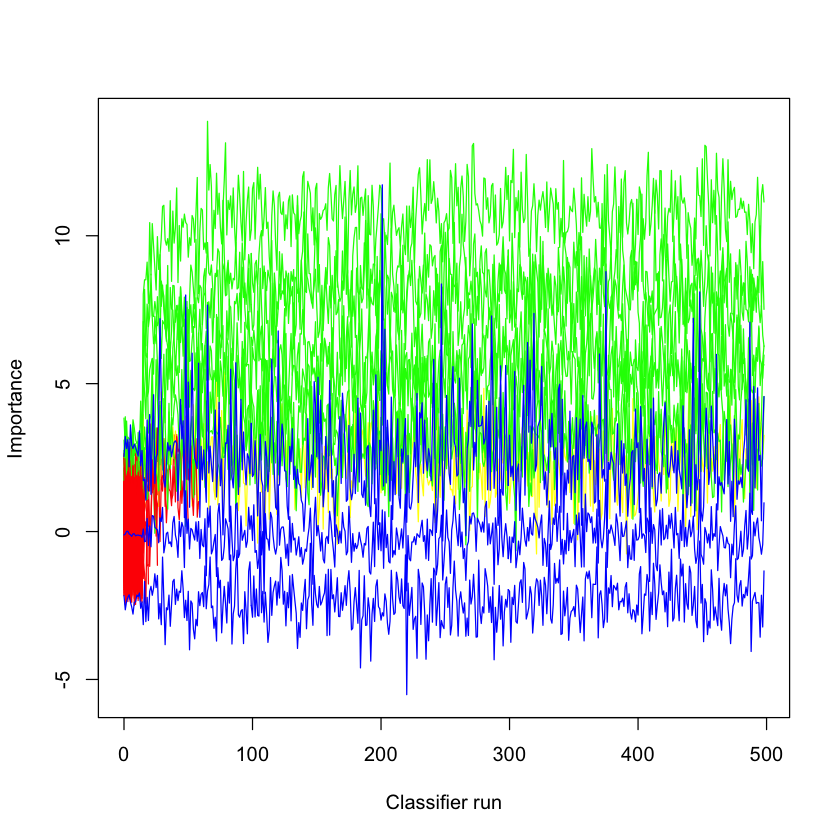

In [6]:
# print(boruta_AD8)
plot(boruta_AD8, las=2, cex.axis=1)
plotImpHistory(boruta_AD8)
# print(boruta_MOCA)
# plot(boruta_MOCA, las=2, cex.axis=0.7)